In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
ann = Sequential()
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [17]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = ann.fit(X_train_scaled, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 890us/step - loss: 0.5242 - accuracy: 0.7768
Epoch 2/50
250/250 [==============================] - 0s 771us/step - loss: 0.4297 - accuracy: 0.8113
Epoch 3/50
250/250 [==============================] - 0s 801us/step - loss: 0.3974 - accuracy: 0.8310
Epoch 4/50
250/250 [==============================] - 0s 912us/step - loss: 0.3677 - accuracy: 0.8433
Epoch 5/50
250/250 [==============================] - 0s 731us/step - loss: 0.3624 - accuracy: 0.8518
Epoch 6/50
250/250 [==============================] - 0s 791us/step - loss: 0.3556 - accuracy: 0.8533
Epoch 7/50
250/250 [==============================] - 0s 747us/step - loss: 0.3483 - accuracy: 0.8556
Epoch 8/50
250/250 [==============================] - 0s 691us/step - loss: 0.3321 - accuracy: 0.8659
Epoch 9/50
250/250 [==============================] - 0s 719us/step - loss: 0.3407 - accuracy: 0.8652
Epoch 10/50
250/250 [==============================] - 0s 715us/step - loss: 0.336

In [19]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 32)                  416       
_________________________________________________________________
dense_1 (Dense)              (32, 32)                  1056      
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


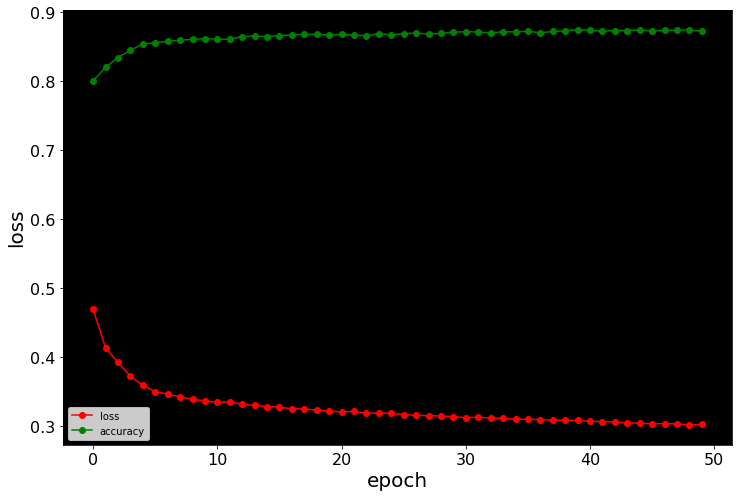

In [22]:
plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.plot(history.history['loss'], 'o-', color='red', label='loss')
plt.plot(history.history['accuracy'], 'o-', color='green', label='accuracy')
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend();

In [23]:
y_pred = ann.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

Testing Accuracy: 0.854


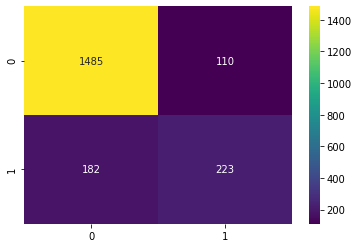

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='viridis', annot=True, fmt='d')
print("Testing Accuracy:", accuracy_score(y_test, y_pred))